## Understanding the Experiment/Understanding the Data Structure: 
---
Week 2 - Aresty: Christopher Lam

An EM2040 sonar is mounted to the keel of an ROV (in this case a cart on rails across a pool), as such:\
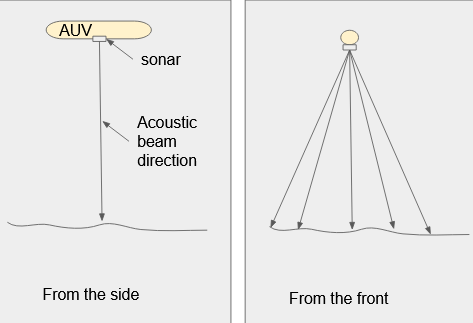

The structure of the data:
* The data from the sensor will come in pings
* Each ping is comprised of N beams (~256). Each individual beam can be broken down into a timeseries of amplitudes
    * The amplitude series has a separate timescale then the one between separate pings.
    * The movement of the sonar system (AUV) can also influence this although we currently do not take this into account
* We can interpret the data as a 3D Matrix with the following dimensions:
    * Ping #
    * Beam #
    * Time along beam (Samples)
        
A few things to note when observing the data:
* The backscattering intensity is  proportional to the 'hardness' of the material (higher decibles = harder material)
* The frequency of the beam will affect the width of the beam (higher frequencies result in a 'tighter' cone if depth is constant)
* 

TASK: Plot a 3D visualization of the water column data from April 13 [Data](https://docs.google.com/document/d/12uC_UFb2oGnpR9hk4VBBNUJgEMYkZq3b/edit)

In [49]:
import KMALL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [42]:
# Import the data (April 13 UNH data, kmwcd = water column data)
filepath = 'data/0001_20230413_160826.kmwcd'

# Read the data
ping_data = KMALL.kmall(filepath)
ping_data.index_file()
print('File "{}" contains the following datagrams:'.format(filepath))
ping_data.report_packet_types()

File "data/0001_20230413_160826.kmwcd" contains the following datagrams:
             Count     Size:  Min Size  Max Size
MessageType                                     
b'#CHE'        213      8520        40        40
b'#IIP'          1      1106      1106      1106
b'#IOP'          1      1232      1232      1232
b'#MWC'        213  31117076    142340    152120
b'#SVP'          1       112       112       112


There are different packet types that are contained within the data file. We are only concerned with the #MWC or multibeam water column datagram

In [53]:
MWC_packets = ping_data.Index["MessageType"] == "b'#MWC'"
MWC_idx = ping_data.Index[MWC_packets]
print('Found {} MWC packets'.format(len(MWC_idx)))
print(MWC_idx)

# Extract the MWC data
ping_datagrams = ping_data.read_index_row(MWC_idx)

Found 213 MWC packets
              ByteOffset  MessageSize MessageType
Time                                             
1.681402e+09        2490       143844     b'#MWC'
1.681402e+09      146374       144328     b'#MWC'
1.681402e+09      290742       143668     b'#MWC'
1.681402e+09      434450       147104     b'#MWC'
1.681402e+09      581594       144472     b'#MWC'
...                  ...          ...         ...
1.681402e+09    30376246       149684     b'#MWC'
1.681402e+09    30525970       151448     b'#MWC'
1.681402e+09    30677458       149612     b'#MWC'
1.681402e+09    30827110       149884     b'#MWC'
1.681402e+09    30977034       151012     b'#MWC'

[213 rows x 3 columns]


AttributeError: 'kmall' object has no attribute 'read_index_row'